In [1]:
using Plots
using Pkg
using FFTW
using Distributions


(process:18100): GLib-GIO-WARNING **: 14:44:53.019: Unexpectedly, UWP app `Microsoft.ZuneVideo_10.22041.10091.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ZuneVideo_8wekyb3d8bbwe!Microsoft.ZuneVideo') supports 33 extensions but has no verbs


Zadania:
1. Zamień sygnał na sumę sygnałów <b>(1 pkt)</b> np
```julia
x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400) 
```

  Zaobserwuj wynik transformaty i wyjaśnij go.
<p> 

In [2]:
cols = palette(:rust, 7)

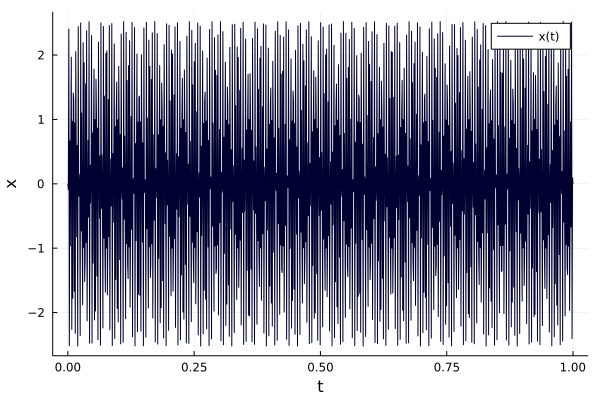

In [3]:
# produkcja sztucznego sygnału.
# Wybieram częstotliwość próbkowania
Fs = 1024;  

# generuje wektor punktów czasowych w przedziale [0 1] co 1/Fs
t = 0:1/(Fs-1):1; 

#Obliczam wartość sygnału (tutaj sinus o częstotliwości 200 Hz) 
x = sin.(2*pi*t*200) + 2 * sin.(2*pi*t*600)

plot(t, x, color=cols[1], xlabel = "t", ylabel = "x", label = "x(t)")

In [4]:
# Dokonuję transformaty Fouriera
y = fft(x)

1024-element Vector{ComplexF64}:
 2.3092638912203256e-14 + 0.0im
   8.101846726393802e-6 - 0.002640783736034158im
  3.2410989513564914e-5 - 0.0052821038448687685im
   7.293821554421598e-5 - 0.007924496978293283im
 0.00012970152288449555 - 0.010568500358528632im
  0.0002027261252410817 - 0.013214652050865805im
  0.0002920444758287566 - 0.01586349125819342im
  0.0003976962991396604 - 0.018515558596354786im
  0.0005197286093627795 - 0.02117139638809107im
  0.0006581957679254735 - 0.023831548951753767im
  0.0008131595103542111 - 0.02649656288473201im
  0.0009846890108202722 - 0.029166987368733466im
  0.0011728609322325667 - 0.03184337445120056im
                        ⋮
  0.0011728609322370076 + 0.031843374451201445im
   0.000984689010819828 + 0.0291669873687328im
  0.0008131595103515465 + 0.026496562884731123im
  0.0006581957679214767 + 0.023831548951753767im
  0.0005197286093761022 + 0.02117139638810528im
 0.00039769629912633775 + 0.018515558596364556im
 0.00029204447582564796 + 0.01586

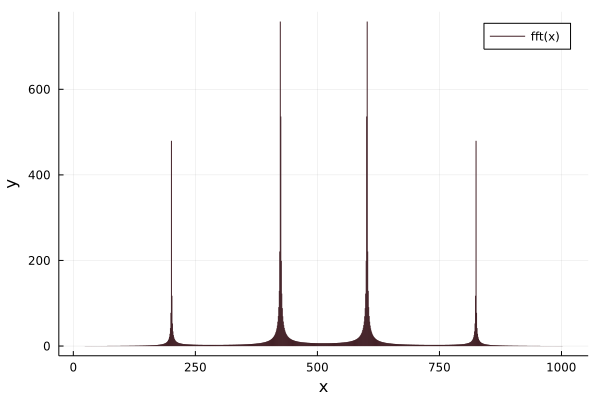

In [5]:
# wykres słupkowy transformaty (moduł z liczb zespolonych).
# symetryczny
# widoczna wysoka amplituda dla częstotliwości sygnału (tutaj 200 i 600) oraz symetrycznego odbicia tej 
# częstotliwości  
sticks((abs.(fft(x))), color=cols[2], xlabel = "x", ylabel = "y", label = "fft(x)")

2.  Usuwanie szumów <b>(1 pkt)</b> :

    1. Wypełniamy tablicę wartościami funkcji cosinus ("sygnału") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand().
    2. Proszę narysować wykres zaszumionej funkcji.
    3. Narysować wykres transformaty Fouriera (widmo)  tego sygnału (jak poprzednio).
    4. Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału.
    5.Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla <b> częsci  rzeczywistej</b>. Porównać z wejściowym wykresem sygnału.
<p>

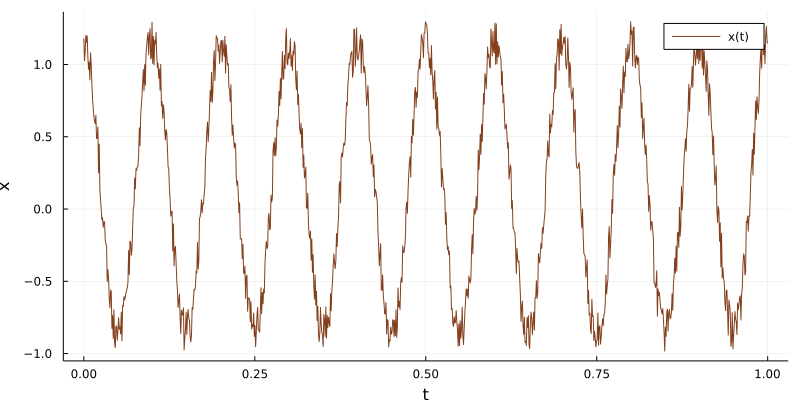

In [6]:
# produkcja sztucznego sygnału
# Fs - częstotliwość próbkowania
Fs = 1024;  

# wektor punktów czasowych w przedziale [0 1] co 1/Fs
t = 0:1/(Fs-1):1; 

# wartość sygnału (cosinus o częstotliwości 10 Hz) 
x = cos.(2*pi*t*10) .+ 0.3*rand(Fs)
p1 = plot(t, x, color=cols[3], xlabel = "t", ylabel = "x", label = "x(t)", size=(800, 400))

In [7]:
y = rfft(x)

513-element Vector{ComplexF64}:
    153.9354625278665 + 0.0im
    1.975968208631075 - 0.5590281756237335im
   3.8185519766301677 + 0.2543328327805279im
   -4.508954313948637 + 0.9370081764768521im
   0.5308101293110981 - 0.12136132330079952im
   2.6506688156339138 - 0.7595801684288362im
   3.8920123658803245 + 0.3756898661046397im
   1.9923924581217125 + 6.533690544421433im
    3.585073610340837 + 4.835756904301219im
   1.5196529262232246 - 1.205259080809647im
    512.0616723651434 + 15.84564981452616im
   -5.705170223645856 + 1.8444124526805064im
 -0.03811748347959343 + 0.42677575680713375im
                      ⋮
 -0.28128804631245297 - 0.13313819812500127im
  -0.5827202146403181 - 0.3919065908352035im
   -2.001025802929203 + 2.511618317407514im
   0.5072065799683563 - 0.9111841001262728im
  0.09874823793061105 - 1.1395570735777492im
  -1.4729642765640403 + 0.7711987566662517im
  -1.1434196247724022 - 0.39543608107487793im
   0.7447757289400174 - 3.1229984748985373im
    -1.35939248

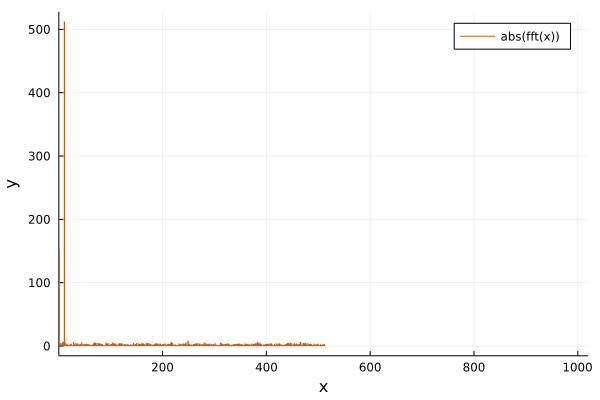

In [8]:
sticks((abs.(y)), color=cols[4], xlabel = "x", ylabel = "y", label = "abs(fft(x))", width=1.3, xlims=(0.2, 1020))

In [9]:
# usuwanie szumów
for i in 1:length(y) if abs(y[i]) < 50 y[i] = 0 end end

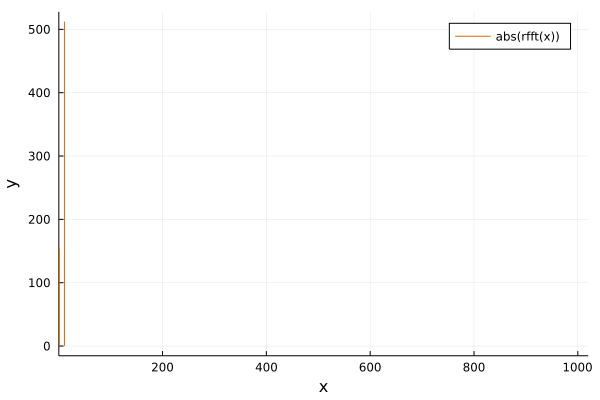

In [10]:
sticks((abs.(y)), color=cols[5], xlabel = "x", ylabel = "y", label = "abs(rfft(x))", xlims=(0.2, 1020))

In [11]:
nx = irfft(y, Fs)

1024-element Vector{Float64}:
 1.1504480539630404
 1.146668153241623
 1.1391382516522683
 1.1278866900443048
 1.1129558167550189
 1.0944018282200754
 1.0722945574628242
 1.046717211258567
 1.017766056963044
 0.9855500601838447
 0.9501904746584642
 0.911820385882615
 0.8705842102064718
 ⋮
 0.9121517415670775
 0.9504973571028817
 0.985831314351991
 1.018020624277737
 1.0469441335859155
 1.0724929807184274
 1.0945710055836035
 1.1130951114810754
 1.1279955778589943
 1.1392163227264427
 1.1467151137333875
 1.1504637271237077

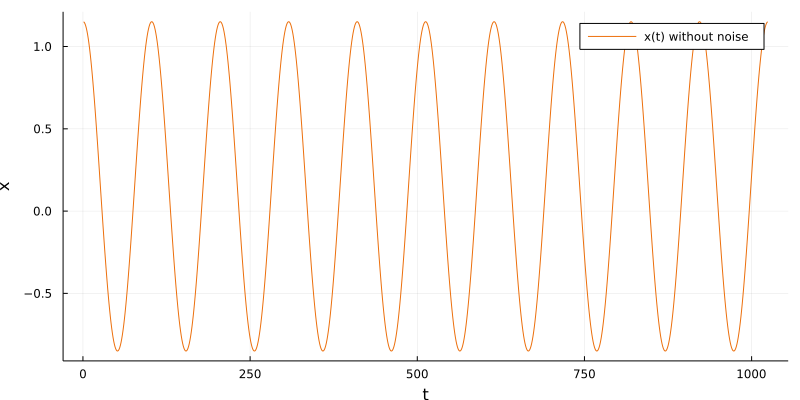

In [12]:
p2 = plot(nx, color=cols[6], xlabel = "t", ylabel = "x", label = "x(t) without noise", size=(800, 400))

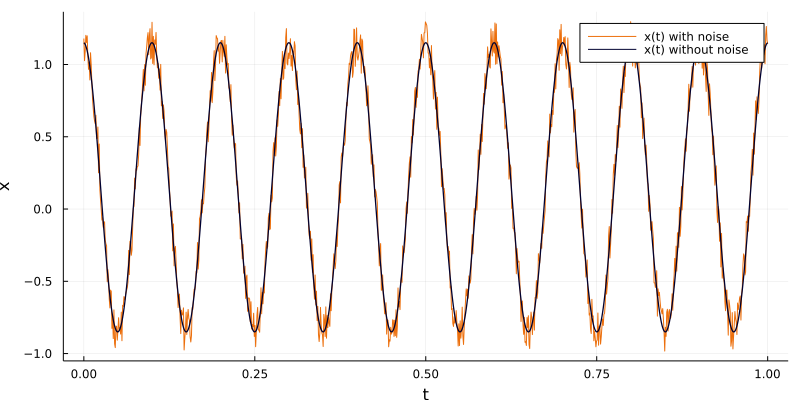

In [13]:
plot(t, x, color=cols[6], xlabel = "t", ylabel = "x", label = "x(t) with noise", size=(800, 400))
plot!(t, nx, color=cols[1], xlabel = "t", ylabel = "x", label = "x(t) without noise", size=(800, 400), width=1.3)